In [1]:
import spacy
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../datasets/extracted_summary.csv")
df.head()

text  \
0  Human evaluation machine translation ( MT ) we...   
1  A large number current language processing sys...   
2  Current automatic summarizers usually rely sen...   
3  Even moderately long document typically addres...   
4  Word sense disambiguation often cast problem s...   

                                             summary  \
0  Bleu: A Method For Automatic Evaluation Of Mac...   
1  TnT - A Statistical Part-Of-Speech Tagger\nTri...   
2  Sentence Reduction For Automatic Text Summariz...   
3  Advances In Domain Independent Linear Text Seg...   
4  A Simple Approach To Building Ensembles Of Nai...   

                                   extracted_summary  
0  For part , various human evaluation approach q...  
1  Furthermore , large interest part-ofspeech tag...  
2  We call operation remove extraneous phrase ext...  
3  , 1997b ) improve document navigation visually...  
4  A learning algorithm induce representative mod...

In [4]:
df.describe()

text  \
count                                                 945   
unique                                                945   
top     Human evaluation machine translation ( MT ) we...   
freq                                                    1   

                                                  summary  \
count                                                 945   
unique                                                945   
top     Bleu: A Method For Automatic Evaluation Of Mac...   
freq                                                    1   

                                        extracted_summary  
count                                                 945  
unique                                                945  
top     For part , various human evaluation approach q...  
freq                                                    1

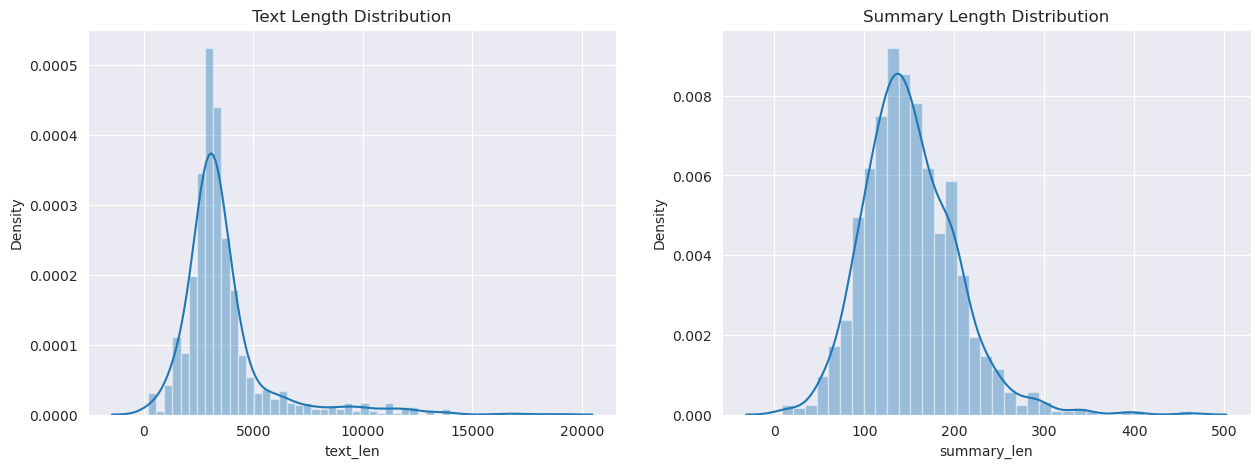

In [5]:
df['text_len'] = df['text'].apply(lambda x: len(x.split()))
df['summary_len'] = df['summary'].apply(lambda x: len(x.split()))

sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df['text_len'], ax=ax[0])
sns.distplot(df['summary_len'], ax=ax[1])
ax[0].set_title('Text Length Distribution')
ax[1].set_title('Summary Length Distribution')
plt.show()

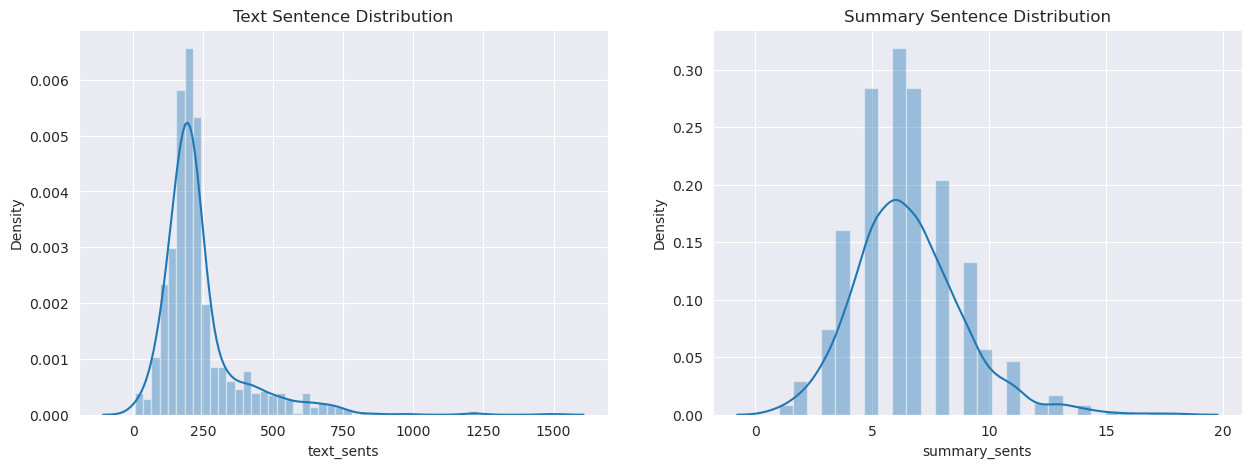

In [7]:
# draw the number of sentences in the text and summary
df['text_sents'] = df['text'].apply(lambda x: len(sent_tokenize(x)))
df['summary_sents'] = df['summary'].apply(lambda x: len(sent_tokenize(x)))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df['text_sents'], ax=ax[0])
sns.distplot(df['summary_sents'], ax=ax[1])
ax[0].set_title('Text Sentence Distribution')
ax[1].set_title('Summary Sentence Distribution')
plt.show()

In [8]:
# display smallest text sentence and show their full values
# remove empty text
df = df[df['text'] != '']
# reset index
df = df.reset_index(drop=True)
df[df['text'] == df['text'].min()]

text  \
243  ( l , appin Leass , 1994 ) describe algorithm ...   

                                               summary  \
243  Anaphora For Everyone: Pronominal Anaphora Res...   

                                     extracted_summary  text_len  summary_len  \
243  ( l , appin Leass , 1994 ) describe algorithm ...      4122          131   

     text_sents  summary_sents  
243         179              5

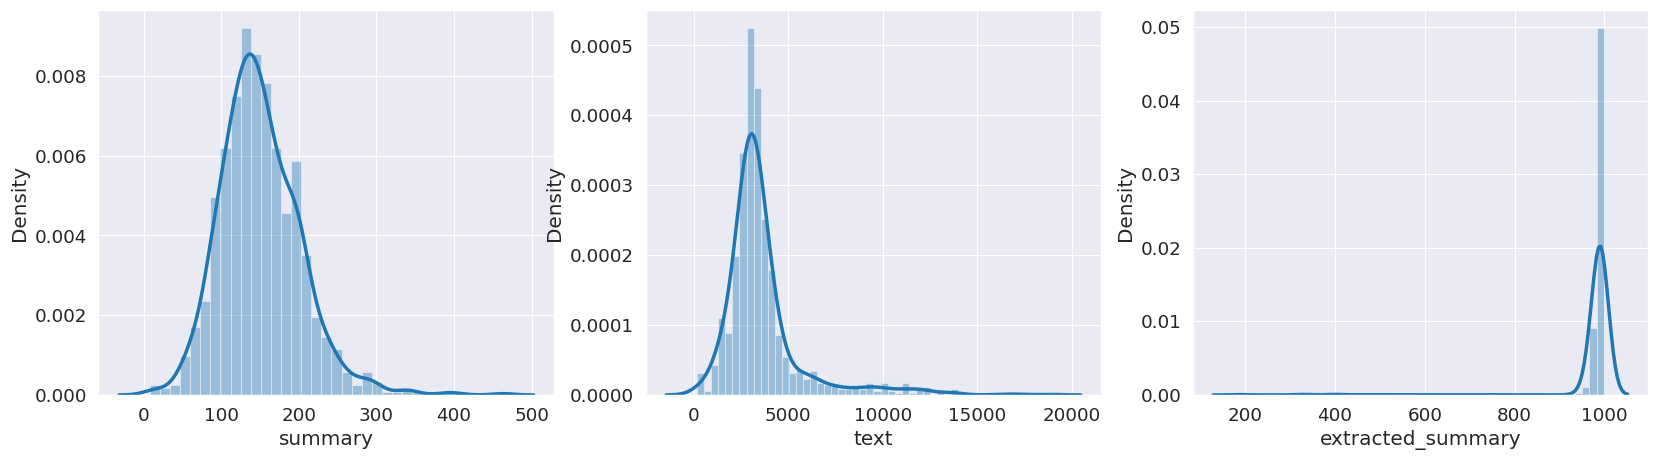

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.distplot(df["summary"].apply(lambda x: len(x.split())), ax=ax[0])
sns.distplot(df["text"].apply(lambda x: len(x.split())), ax=ax[1])
sns.distplot(df["extracted_summary"].apply(lambda x: len(x.split())), ax=ax[2])
plt.show()

In [ ]:
!pip install pandas-profiling

In [11]:
# use pandas profiler
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]